# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

1. Valid Consent

    In the context of the K-Tunnus service provided by Kesko Corporation, consent is one of the lawful bases for processing personal data under the General Data Protection Regulation (GDPR). Specifically, Article 6(1)(a) of the GDPR states that personal data may be processed when "the data subject has given consent to the processing of his or her personal data for one or more specific purposes." The conditions for valid consent are further defined in Article 7 and Recital 32, which require that consent must be freely given, specific, informed, and unambiguous. In the K-Tunnus Data Protection Notice, Kesko explicitly states that when users accept the use of Google Analytics in cookie settings, and consent to the use of customer identifiers for analysis purposes, their browsing data will be recorded in Kesko Group’s web browsing register. This indicates that consent is given through a clear affirmative action (accepting cookies), for a defined and limited purpose (analytics), and based on transparent information. Furthermore, the notice implies that consent can be withdrawn at any time, consistent with Article 7(3) of the GDPR. Therefore, the consent mechanism described in the K-Tunnus service generally meets the GDPR requirements of being informed, specific, and revocable. Whether the consent is fully "freely given" would depend on whether users can refuse non-essential cookies without losing access to core services, but overall the implementation aligns well with the legal conditions for valid consent under the GDPR.

2. Your Right to Access Your Personal Data

    Under the GDPR, individuals have the right to know whether their personal data are being processed and to obtain a copy of such data. Articles 12 to 15 of the GDPR outline these rights and the obligations of data controllers. Article 12(1) requires controllers to provide information to data subjects in a concise, transparent, and easily accessible form, while Article 15(1) grants individuals the right to access their personal data and receive information on the purposes of processing, the categories of data, data recipients, storage duration, and their associated rights. Kesko facilitates this right through a dedicated Data Protection Portal, where users can securely submit access requests using strong electronic identification methods. Alternatively, users can send a written request by post, marked “Data protection/K-Tunnus,” and responses containing personal data are delivered by registered mail to ensure confidentiality. These procedures comply with Articles 12(2) and 12(6), which require controllers to facilitate the exercise of data subject rights while verifying identity when necessary. In practice, Kesko’s mechanisms for submitting and receiving access requests appear compliant with the GDPR’s transparency and security requirements, and they demonstrate a clear effort to respect the data subject’s rights. Although the process may feel somewhat technical for some users, it provides the essential safeguards and procedural clarity required by Articles 12 and 15.

3. Anonymisation and Pseudonymisation

    Anonymisation and pseudonymisation are two different approaches to reducing privacy risks in the processing of personal data, as defined in the GDPR. According to Recital 26, data are considered anonymised when the information “does not relate to an identified or identifiable natural person” or when identification is no longer possible “by any means reasonably likely to be used.” In such cases, the data are no longer subject to the GDPR. Pseudonymisation, on the other hand, is defined in Article 4(5) as the processing of personal data in such a way that the data can no longer be attributed to a specific individual without the use of additional information, which is kept separately and subject to technical and organisational safeguards. Thus, pseudonymised data still qualify as personal data under the GDPR because re-identification remains possible. The key distinction lies in reversibility: anonymisation is an irreversible process that permanently removes identifiers, whereas pseudonymisation merely replaces them with artificial identifiers or codes that can later be traced back if necessary.

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

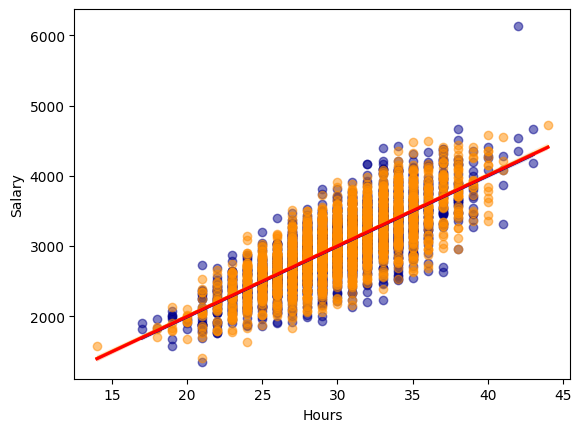

In [3]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [4]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 100.3


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

Original scenario:


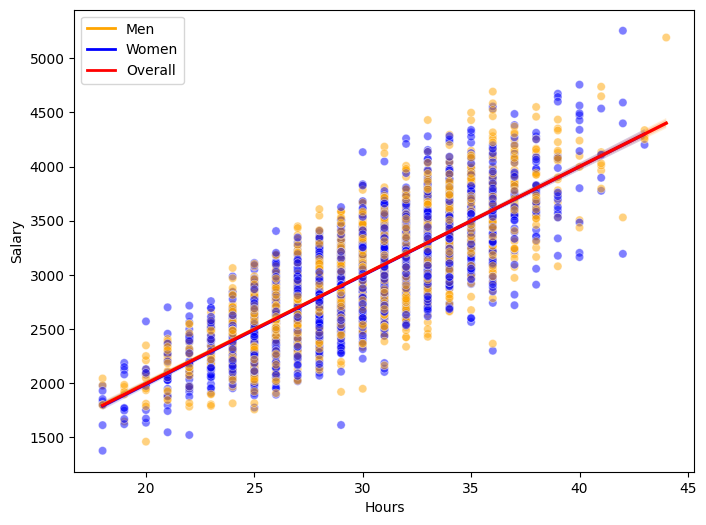

Slope: 100.3

Scenario a (Direct discrimination):


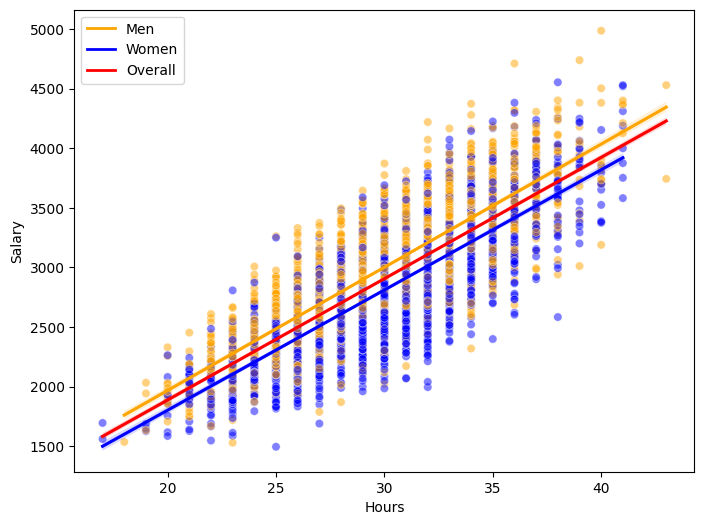

Slope: 101.8

Scenario b (No discrimination, different hours distribution):


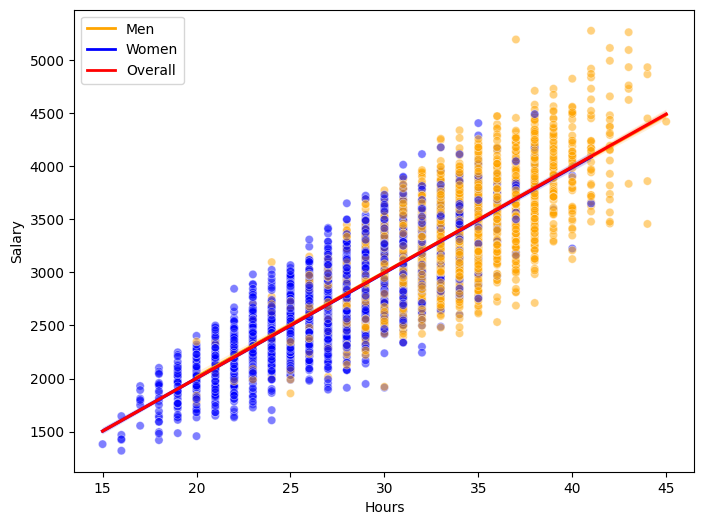

Slope: 99.6

Scenario c (Indirect discrimination):


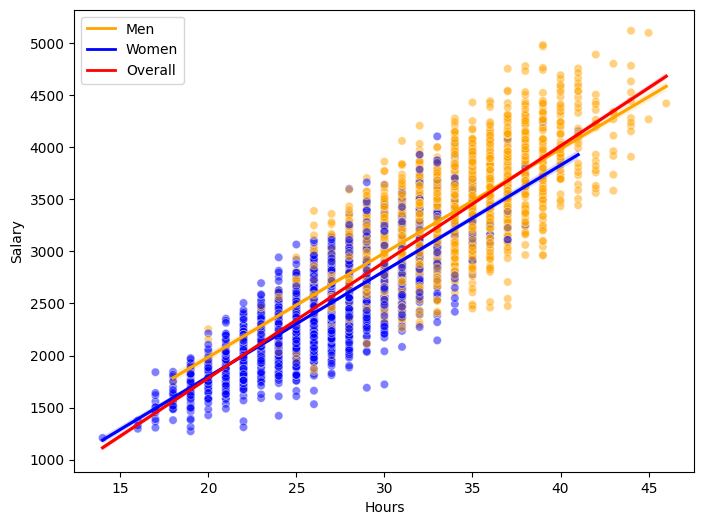

Slope: 111.4

Detecting indirect discrimination in scenario c:

Model coefficients:
Intercept: -38.6
Hours: 100.7
Gender: -172.7

Slope comparison:
Original: 100.3
Scenario a: 101.8
Scenario b: 99.6
Scenario c: 111.4


In [ ]:

def simulate_data(n=5000, scenario=None):
    gen = np.random.binomial(1, 0.5, size=n)
    
    if scenario == 'b' or scenario == 'c':
        hrs_men = np.random.binomial(60, 0.55, size=sum(gen == 0))
        hrs_women = np.random.binomial(60, 0.45, size=sum(gen == 1))
        hrs = np.zeros(n)
        hrs[gen == 0] = hrs_men
        hrs[gen == 1] = hrs_women
    else:
        hrs = np.random.binomial(60, 0.5, size=n)
    
    sal_base = hrs * np.random.normal(100, 10, size=n)
    
    if scenario == 'a' or scenario == 'c':
        sal_base[gen == 1] -= 200
    
    return pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal_base})

def plot_data(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Hours", y="Salary", hue="Gender", data=data, alpha=0.5, palette={0: 'orange', 1: 'blue'})
    men_line = sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 0], 
                          marker="None", color="orange", label="_nolegend_")
    women_line = sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 1], 
                            marker="None", color="blue", label="_nolegend_")
    overall_line = sns.regplot(x="Hours", y="Salary", data=data, 
                             marker="None", color="red", label="_nolegend_")
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='orange', lw=2, label='Men'),
        Line2D([0], [0], color='blue', lw=2, label='Women'),
        Line2D([0], [0], color='red', lw=2, label='Overall')
    ]
    plt.legend(handles=legend_elements)
    plt.show()

def calculate_slope(data):
    hrs = data["Hours"].values.reshape(-1, 1)
    sal = data["Salary"].values.reshape(-1, 1)
    reg = LinearRegression().fit(hrs, sal)
    slope = reg.coef_[0][0]
    print(f"Slope: {slope:.1f}")
    return slope

def detect_indirect_discrimination(data):
    X = pd.get_dummies(data[['Hours', 'Gender']], drop_first=True)
    y = data['Salary']
    reg = LinearRegression().fit(X, y)
    print("\nModel coefficients:")
    print(f"Intercept: {reg.intercept_:.1f}")
    for i, col in enumerate(X.columns):
        print(f"{col}: {reg.coef_[i]:.1f}")
    return reg

print("Original scenario:")
data_original = simulate_data(scenario=None)
plot_data(data_original)
original_slope = calculate_slope(data_original)

print("\nScenario a (Direct discrimination):")
data_a = simulate_data(scenario='a')
plot_data(data_a)
a_slope = calculate_slope(data_a)

print("\nScenario b (No discrimination, different hours distribution):")
data_b = simulate_data(scenario='b')
plot_data(data_b)
b_slope = calculate_slope(data_b)

print("\nScenario c (Indirect discrimination):")
data_c = simulate_data(scenario='c')
plot_data(data_c)
c_slope = calculate_slope(data_c)


print("\nDetecting indirect discrimination in scenario c:")
reg_model = detect_indirect_discrimination(data_c)

print("\nSlope comparison:")
print(f"Original: {original_slope:.1f}")
print(f"Scenario a: {a_slope:.1f}")
print(f"Scenario b: {b_slope:.1f}")
print(f"Scenario c: {c_slope:.1f}")

1. Only in scenario b (different work hour distributions but no wage differences) the slope remain close to 100. In scenarios a (direct discrimination) and c (indirect discrimination), the slope generally remains close to 100 because the slope primarily reflects the relationship between work hours and wages, while the intercept is affected by direct discrimination.

2. To detect indirect discrimination, protected characteristics (such as gender) should be included in the regression model. By constructing a multiple linear regression model, we can:
Observe whether the coefficient of the gender variable is significantly different from zero (indicating direct discrimination), analyze the interaction effect between work hours and gender, and compare the differences in predicted results for different gender groups.
When the model includes both work hours and gender, the gender coefficient can reveal whether there are gender-based wage differences after controlling for work hours.